policy: PPOTorchPolicy


e:\code\github\l1351868270\drl-investment\drl_investment\envs\stocks_v1.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _data['high'] = _data['high']/_data['open'] - 1.0
e:\code\github\l1351868270\drl-investment\drl_investment\envs\stocks_v1.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _data['low'] = _data['low']/_data['open'] - 1.0
e:\code\github\l1351868270\drl-investment\drl_investment\envs\stocks_v1.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

rewards: [0.0, 1.0048085806912732, -0.01, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6047478436876819, -0.01, 0.0, 1.7705212141382531, -0.01, 0.0, 0.1715711336869974, -0.01, 0.0, 0.17872173335071628, -0.01, 1.030617196862259, -0.01, 0.5127914562651481, -0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.18704055116077867, -0.01, 0.0, 0.7146474229338107, -0.01, 0.5834676906438119, -0.01, 0.0, 0.0, 0.0, -3.3693221956600747, -0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 2.429527010904641, -0.01, 0.43343073816037747, -0.01, 0.0, 0.30590728655628285, -0.01, 0.0, -0.5668359386041721, -0.01, 0.772895456362187, -0.01, 0.0, 0.0, 1.4017568466805785, -0.01, 0.0, 0.0, 0.0, 0.0, 1.6695927229668495, -0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.657287616884913, -0.01, 0.0, 0.0, 0.0, 5.6990684069148525, -0.01, 0.0, 2.4886292093017506, -0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.980184797429143, -0.01, 0.0, -5.229369716062894, -0.01, 0.0, 0.0, 0.0, -1.1315792553553983, -0.01, 0.0, 1.1243502314936193, -0.01, -0.13828019844216555

C:\Users\DELL\AppData\Local\Temp\ipykernel_51132\120833825.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


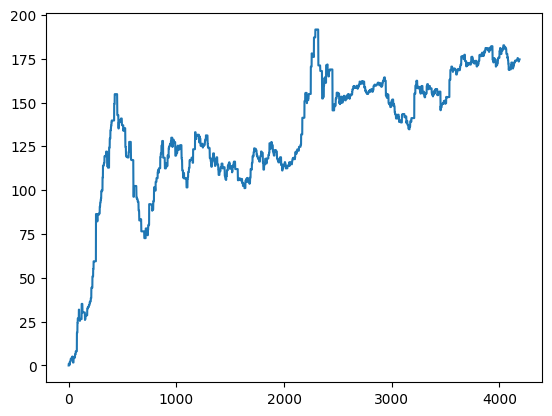

In [2]:
'''
refer to: https://github.com/ray-project/ray/blob/master/rllib/examples/custom_env.py
'''
import numpy as np
import matplotlib.pyplot as plt
from ray.rllib.policy.policy import Policy

from drl_investment.models.ray.fc_net import TorchFC
from drl_investment.envs.stocks_v1 import StocksEnvV1
from drl_investment.data.tdx import unpack_data

from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.logger import pretty_print


df = unpack_data(r'E:\code\github\l1351868270\DRL-investment\drl_investment\tests\assets\sh000001.day')['2006-01-01':]
env_config = {
    'data': df
}

policies = Policy.from_checkpoint(r'C:\Users\DELL\ray_results\PPO_StocksEnvV1_2023-05-17_18-12-16ci1dvfcb\checkpoint_002701')
policy = policies['default_policy']
print(f'policy: {policy}')
env = StocksEnvV1(config=env_config)
observation, _ = env.reset()
done = False
rewards = []
while not done:
    action = policy.compute_single_action(observation)
    observation, reward, done, _, info = env.step(action[0])
    rewards.append(reward)
    if env.render_mode == 'human':
        env.render()

print(f'rewards: {rewards}')
rewards = np.cumsum(np.array(rewards))
fig, ax = plt.subplots()
ax.plot(rewards)
fig.show()
